Data taken from https://transparencia.unicamp.br/paginas/consultar-salarios-do-mes-atual/

In [183]:
from numpy.core.fromnumeric import mean
import pandas as pd #dataframe
import numpy as np#dataframe
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data

In [184]:
data_original = pd.read_csv('consultar-salarios.csv',sep=';')
print(data_original.shape)
data = data_original.drop_duplicates()[0:2000]
print(data.shape)

(14137, 12)
(14137, 12)


,Matrícula,Nome,Cargo,Referência,Salário Bruto Nominal,Indenizações,Redutor,Descontos,Líquido,Férias e 13o Salário,Lotação,Salário Bruto Efetivo
0,1651,DERCIO TABOSSI,PR ASS ADMINISTRATIVOS / Técnico em administração,M2A,"R$ 10.186,69","R$ 0,00","R$ 0,00","R$ 2.303,08","R$ 7.883,61","R$ 0,00",01.14.16.04 REITORIA/PREFEITURA GABINETE/COORD...,"R$ 10.186,69"
1,1678,RAUL DOS SANTOS,PR APOIO TEC SERVICOS / Técnico gráfico,M1A,"R$ 7.360,50","R$ 0,00","R$ 0,00","R$ 3.615,89","R$ 3.744,61","R$ 0,00","10.10 INSTITUTO DE MATEMATICA, ESTATISTICA E C...","R$ 7.360,50"
2,1686,EDUARDO BRAGA,Técnico Administrativo,24,"R$ 4.250,66","R$ 0,00","R$ 0,00","R$ 2.835,92","R$ 1.414,74","R$ 0,00",01.12.12 REITORIA/DIRETORIA GERAL DE ADMINISTR...,"R$ 4.250,66"
3,10022,BERENICE FERREIRA,Atendente de Enfermagem,16,"R$ 2.659,49","R$ 0,00","R$ 0,00","R$ 255,40","R$ 2.404,09","R$ 0,00",27.09.15.02 HOSPITAL DA MULHER PROF.DR.JOSE AR...,"R$ 2.659,49"
4,13960,LIDIA TEREZINHA FERREIRA,PAEPE APOSENTADO / Prof Assuntos Admin,S1A,"R$ 11.739,72","R$ 0,00","R$ 0,00","R$ 2.962,46","R$ 8.777,26","R$ 0,00",26 INSTITUTO DE ECONOMIA,"R$ 11.739,72"
...,...,...,...,...,...,...,...,...,...,...,...,...
14132,316688,EDSON ROBERTO DE CARVALHO,PR APOIO TEC SERVICOS / Eletrotécnico,M1A,"R$ 4.534,46","R$ 0,00","R$ 0,00","R$ 688,64","R$ 3.845,82","R$ 0,00",01.14.16.05 REITORIA/PREFEITURA GABINETE/COORD...,"R$ 4.534,46"
14133,315719,ANGELA CHRISTINA LUCAS,Professor Doutor I,MS3.1,"R$ 11.222,92","R$ 0,00","R$ 0,00","R$ 2.816,14","R$ 8.406,78","R$ 0,00",36 FACULDADE DE CIENCIAS APLICADAS,"R$ 11.222,92"
14134,315593,GEIZA BAIRRAL ASSIS,TECNICO ENFERMAGEM / Técnico de enfermagem,M1A,"R$ 4.168,78","R$ 0,00","R$ 0,00","R$ 592,86","R$ 3.575,92","R$ 709,50",15.16.11.01 HOSPITAL DE CLINICAS/DEPARTAMENTO ...,"R$ 4.168,78"
14135,318547,THAMIRES GUIMARIS ELLER STOFEL NICOLETTO,ENFERMEIRO / Enfermeiro,S1A,"R$ 2.604,69","R$ 0,00","R$ 0,00","R$ 265,26","R$ 2.339,43","R$ 0,00",15.16.10.01 HOSPITAL DE CLINICAS/DEPARTAMENTO ...,"R$ 2.604,69"


## Data cleaning

In [185]:
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace('.','')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str.replace(',','.')
data['Salário Bruto Nominal'] = data['Salário Bruto Nominal'].str[3:]

data['Indenizações'] = data['Indenizações'].str.replace('.','')
data['Indenizações'] = data['Indenizações'].str.replace(',','.')
data['Indenizações'] = data['Indenizações'].str[3:]

data['Redutor'] = data['Redutor'].str.replace('.','')
data['Redutor'] = data['Redutor'].str.replace(',','.')
data['Redutor'] = data['Redutor'].str[3:]

data['Descontos'] = data['Descontos'].str.replace('.','')
data['Descontos'] = data['Descontos'].str.replace(',','.')
data['Descontos'] = data['Descontos'].str[3:]

data['Líquido'] = data['Líquido'].str.replace('.','')
data['Líquido'] = data['Líquido'].str.replace(',','.')
data['Líquido'] = data['Líquido'].str[3:]

data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace('.','')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str.replace(',','.')
data['Férias e 13o Salário'] = data['Férias e 13o Salário'].str[3:]

data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace('.','')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str.replace(',','.')
data['Salário Bruto Efetivo'] = data['Salário Bruto Efetivo'].str[3:]

In [186]:
data["Salário Bruto Nominal"] = pd.to_numeric(data["Salário Bruto Nominal"])
data["Indenizações"] = pd.to_numeric(data["Indenizações"])
data["Redutor"] = pd.to_numeric(data["Redutor"])
data["Descontos"] = pd.to_numeric(data["Descontos"])
data["Líquido"] = pd.to_numeric(data["Líquido"])
data["Férias e 13o Salário"] = pd.to_numeric(data["Férias e 13o Salário"])
data["Salário Bruto Efetivo"] = pd.to_numeric(data["Salário Bruto Efetivo"])
#data.dtypes

In [190]:
data[['Cargo1','Cargo2']] = data['Cargo'].str.split(pat=' / ',expand=True)
for i in range(0,data['Cargo'].size):
    if (data['Cargo2'].loc[i] is None): 
        data['Cargo2'].loc[i]=data['Cargo1'].loc[i]
        data['Cargo1'].loc[i]=None

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


## Ploting some graphs

In [188]:
f,(ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)}, figsize=(10,5))

mean=df['Salário Bruto Nominal'].mean()
median=df['Salário Bruto Nominal'].median()

sns.boxplot(df['Salário Bruto Nominal'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')

sns.distplot(data['Salário Bruto Nominal'])
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

plt.savefig("Figures/salaries.jpeg")

KeyError: 'Salário Bruto Nominal'

In [181]:
df = data['Lotação']
df = df.sort_values()
df.unique

<bound method Series.unique of 1062                01.01 REITORIA/GABINETE DO REITOR
1915                01.01 REITORIA/GABINETE DO REITOR
994                 01.01 REITORIA/GABINETE DO REITOR
2048                01.01 REITORIA/GABINETE DO REITOR
154                 01.01 REITORIA/GABINETE DO REITOR
                             ...                     
9110     41 DIVISAO DE EDUCAÇAO INFANTIL COMPLEMENTAR
12717    41 DIVISAO DE EDUCAÇAO INFANTIL COMPLEMENTAR
9124     41 DIVISAO DE EDUCAÇAO INFANTIL COMPLEMENTAR
10501    41 DIVISAO DE EDUCAÇAO INFANTIL COMPLEMENTAR
8938     41 DIVISAO DE EDUCAÇAO INFANTIL COMPLEMENTAR
Name: Lotação, Length: 14137, dtype: object>

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='Cargo1'>

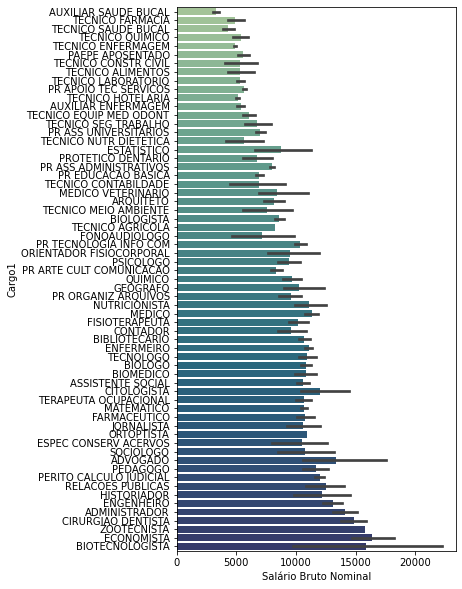

In [178]:
df = data[['Cargo1','Salário Bruto Nominal']]

# df = df.sort_values(by=['Salário Bruto Nominal']).reset_index
result = df.groupby(['Cargo1'])['Salário Bruto Nominal'].aggregate(np.median).reset_index().sort_values('Salário Bruto Nominal')

# g = sns.barplot(x='Cargo1',y='Salário Bruto Nominal',data=df, order=result['Cargo1'])
#g.set_xticklabels(g.get_xticklabels(), rotation=60, horizontalalignment='right')
#g.plot()
plt.subplots(figsize=(5, 10))
sns.barplot(y='Cargo1',x='Salário Bruto Nominal',data=df, order=result['Cargo1'],orient='h',palette='crest')

<AxesSubplot:xlabel='Salário Bruto Nominal', ylabel='Cargo2'>

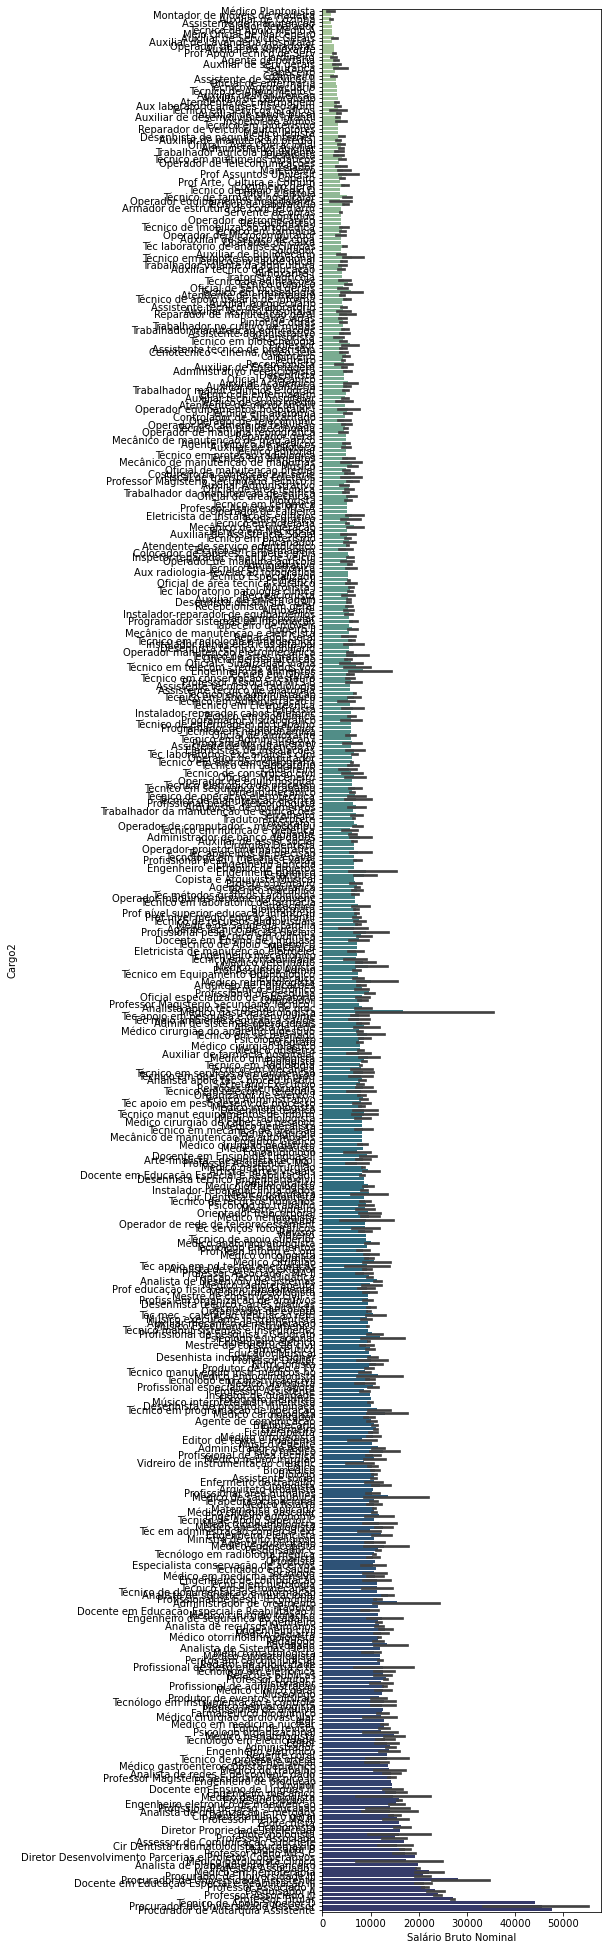

In [179]:
df = data[['Cargo2','Salário Bruto Nominal']]

result = df.groupby(['Cargo2'])['Salário Bruto Nominal'].aggregate(np.median).reset_index().sort_values('Salário Bruto Nominal')

plt.subplots(figsize=(5, 35))
sns.barplot(y='Cargo2',x='Salário Bruto Nominal',data=df, order=result['Cargo2'],orient='h',palette='crest')